In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 14 kB/s 
     |████████████████████████████████| 1.7 MB 40.2 MB/s 
     |████████████████████████████████| 439 kB 43.2 MB/s 
     |████████████████████████████████| 6.0 MB 43.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
!pip install numpy
!pip install scikit-video
!git clone https://github.com/drminix/first-order-model=
%cd /content/first-order-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.2 MB/s 
Cloning into 'first-order-model='...
fatal: unable to access 'https://github.com/drminix/first-order-model=/': The requested URL returned error: 400
[Errno 2] No such file or directory: '/content/first-order-model'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
target_folder = "/content/gdrive/MyDrive"

Mounted at /content/gdrive


# 피마 인디언 당뇨병 분류 문제
### 데이터 구조
- 768명의 인디언에 대한 8가지 변수 데이터 와 당뇨병 여부 판정 데이터로 구성


### 데이터 로딩

In [ ]:
import pandas as pd

diabetes = pd.read_csv('/content/drive/MyDrive/SKT_FLY_AI/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 결측치 확인

In [ ]:
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 이상치 확인
- 0이 될 수 없는데 0이 된 값 확인

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(diabetes[cols] == 0).sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### 데이터 시각화
- 당뇨인 것과 아닌 데이터 수량 비교

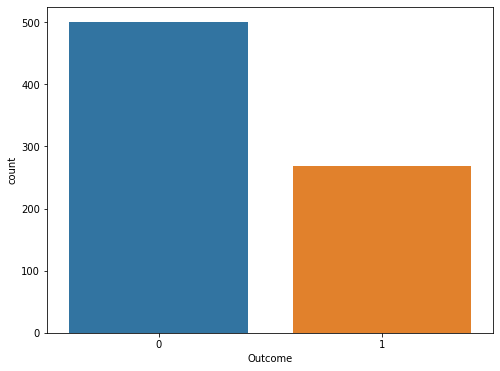

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data = diabetes)
plt.show()

- 숫자로 확인

In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### feature와 label 분리

In [ ]:
X_data = diabetes.drop(['Outcome'], axis=1)
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


- 데이터 분리 여부 확인

In [ ]:
y_data = diabetes['Outcome']
y_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### train과 test 분리
- sklearn 라이브러리 이용

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


### 이상한 값을 가진 데이터 처리
- 평균을 사용

In [ ]:
import numpy as np
def impute_zero(data, col):
  df = data.loc[data[col] != 0, col]
  avg = np.sum(df) / len(df)
  k = len(data.loc[ data[col] == 0, col]) 
  data.loc[ data[col] == 0, col ] = avg
  print('%s : fixed %d, mean: %.3f' % (col, k, avg))

for col in cols:
  impute_zero(X_train, col)

Glucose : fixed 5, mean: 121.847
BloodPressure : fixed 24, mean: 72.239
SkinThickness : fixed 176, mean: 28.596
Insulin : fixed 290, mean: 154.330
BMI : fixed 7, mean: 32.352


- 이상치 처리 여부 재점검

In [ ]:
(X_train[cols] == 0).sum(axis=0)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

- test set에도 적용

In [ ]:
for col in cols:
  impute_zero(X_test, col)

Glucose : fixed 0, mean: 121.052
BloodPressure : fixed 11, mean: 73.091
SkinThickness : fixed 51, mean: 31.524
Insulin : fixed 84, mean: 161.186
BMI : fixed 4, mean: 32.883


### 정규화
- 표준 정규화 모델 사용

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
print(X_train_s[:5])

[[-5.26396861e-01 -1.25832567e+00  0.00000000e+00  4.22787785e-16
   0.00000000e+00  1.02533391e-15 -4.90734790e-01 -1.03594038e+00]
 [ 1.58804586e+00 -3.27397242e-01  8.07407436e-01 -5.46930179e-01
   0.00000000e+00 -5.99178052e-01  2.41502991e+00  1.48710085e+00]
 [-8.28460107e-01  5.70283740e-01 -2.17042447e+00 -1.14195109e+00
  -8.20791983e-01 -5.27026593e-01  5.49160552e-01 -9.48938958e-01]
 [-1.13052335e+00  1.30172750e+00 -1.83955426e+00  4.22787785e-16
   0.00000000e+00 -1.50828644e+00 -6.39291267e-01  2.79212217e+00]
 [ 6.81856121e-01  4.04046521e-01  6.41972330e-01  1.00012419e+00
   2.48169622e+00  1.99827450e+00 -6.86829340e-01  1.13909516e+00]]


## numpy 배열로 전환
- 벡터화 하여 계산하기 때문에 연산이 효율적

In [ ]:
y_train = y_train.values
y_test = y_test.values
print(type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### 모델 생성
- Dense layer 4개
- 이진 분류이기에 마지막 layer는 활성함수로 sigmoid 사용

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12, input_dim=8, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(4, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid')) 
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                108       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### model compile
- loss 식은 binary cross entropy 사용
  - 이진분류이기 때문

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### 학습

In [ ]:
EPOCHS = 500
BATCH_SIZE = 32
history = model.fit(X_train_s, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split = 0.2, verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 16ms/step - loss: 0.8095 - acc: 0.4236 - val_loss: 0.7519 - val_acc: 0.5041
Epoch 2/500
16/16 [==============================] - 0s 6ms/step - loss: 0.7557 - acc: 0.4847 - val_loss: 0.7083 - val_acc: 0.5854
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.7126 - acc: 0.5458 - val_loss: 0.6712 - val_acc: 0.6911
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.6752 - acc: 0.5967 - val_loss: 0.6410 - val_acc: 0.6748
Epoch 5/500
16/16 [==============================] - 0s 6ms/step - loss: 0.6441 - acc: 0.6212 - val_loss: 0.6172 - val_acc: 0.6748
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6189 - acc: 0.6477 - val_loss: 0.5984 - val_acc: 0.6992
Epoch 7/500
16/16 [==============================] - 0s 7ms/step - loss: 0.5978 - acc: 0.6619 - val_loss: 0.5819 - val_acc: 0.6829
Epoch 8/500
16/16 [==============================] - 0s 6ms/step - loss: 0.5803 - 

### 학습 곡선
- overfitting 문제를 피하기 힘들다

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch
 plt.figure(figsize=(16,8))
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
 plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
 plt.legend()
 
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
 plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
 plt.legend()
 plt.show()

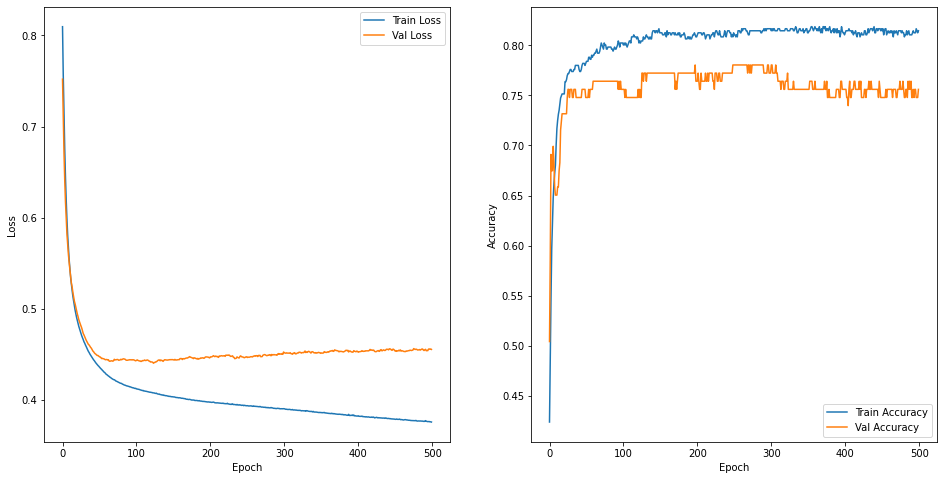

In [ ]:
plot_history(history)

# 이진 분류
- callback 함수 사용

In [ ]:
from tensorflow import keras
model = build_model()
model.compile(loss='binary_crossentropy',
 optimizer='adam',
 metrics=['acc'])

### earlystopping 은 학습에 진전이 없으면 조기 종료

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 1000
BATCH_SIZE = 32
history = model.fit(X_train_s, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split = 0.2, callbacks=[early_stop], verbose=1)

Epoch 1/1000
16/16 [==============================] - 1s 25ms/step - loss: 0.6527 - acc: 0.6640 - val_loss: 0.7054 - val_acc: 0.6098
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.6268 - acc: 0.6640 - val_loss: 0.6771 - val_acc: 0.6098
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6059 - acc: 0.6578 - val_loss: 0.6524 - val_acc: 0.6179
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.5876 - acc: 0.6538 - val_loss: 0.6327 - val_acc: 0.6260
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5727 - acc: 0.6619 - val_loss: 0.6148 - val_acc: 0.6341
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5594 - acc: 0.6680 - val_loss: 0.6003 - val_acc: 0.6585
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.5483 - acc: 0.6640 - val_loss: 0.5867 - val_acc: 0.6504
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 0

### test

In [ ]:
y_pred = model.predict(X_test_s)
y_pred

5/5 [==============================] - 0s 5ms/step


array([[4.43383753e-01],
       [1.09163381e-01],
       [6.12831935e-02],
       [1.91444501e-01],
       [4.39938664e-01],
       [6.16414964e-01],
       [6.99084369e-04],
       [5.44971764e-01],
       [7.43449092e-01],
       [6.86318874e-01],
       [1.60959318e-01],
       [8.10808241e-01],
       [3.57056201e-01],
       [4.74047184e-01],
       [1.81329325e-02],
       [4.85464096e-01],
       [8.57576057e-02],
       [2.23448556e-02],
       [7.56205559e-01],
       [6.32217348e-01],
       [2.40721732e-01],
       [2.83335764e-02],
       [2.68308669e-01],
       [3.11540049e-02],
       [5.53765953e-01],
       [8.54009926e-01],
       [6.84690177e-02],
       [1.94475404e-03],
       [8.25613812e-02],
       [7.65787289e-02],
       [9.11135197e-01],
       [7.36821651e-01],
       [7.24948108e-01],
       [7.97251403e-01],
       [6.87254608e-01],
       [8.39277387e-01],
       [8.95102143e-01],
       [2.75191396e-01],
       [3.01318854e-01],
       [5.00976682e-01],


### flatten은 다차원을 1차원으로 바꿔준다

In [ ]:
y_pred= (y_pred >0.5).astype(np.int32).flatten()
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int32)

### confusion matrix 

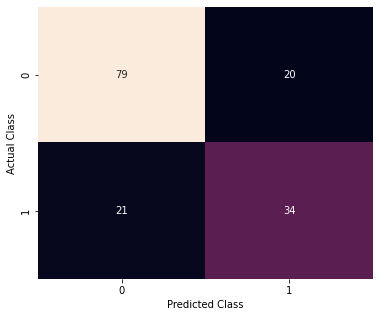

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cf_matrix, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

### 평가 지표 계산
- Precision: 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
- recall score: 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
- f1 score: Precision과 Recall의 조화평균

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
def print_score(y_test, y_pred):
  print('precision: %.3f' % (precision_score(y_test, y_pred)))
  print('recall_score: %.3f' % (recall_score(y_test, y_pred)))
  print('f1_score: %.3f' % (f1_score(y_test, y_pred)))

In [ ]:
print_score(y_test, y_pred)

precision: 0.617
recall_score: 0.673
f1_score: 0.643


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



# 팽귄 데이터 - 다중 분류

### dataset

In [ ]:
!pip install -q tfds-nightly

     |████████████████████████████████| 5.2 MB 4.6 MB/s 


### 패키지

In [ ]:
# 모듈 설치

import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)
     

TensorFlow version: 2.9.2
TensorFlow Datasets version:  4.8.0+nightly


## 데이터 로딩

In [ ]:
# 데이터 확인 

ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)

In [ ]:
# 데이터 확인 

print(df)
print(info.features)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


In [ ]:
# 펭귄 종 이름 확인

class_names = ['Adelie', 'Chinstrap', 'Gentoo']

In [ ]:
# 전처리된 데이터 셋 분리

ds_split, info = tfds.load("penguins/processed", 
                           split=['train[:20%]', 'train[20%:]'], 
                           as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)
     

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/334 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/penguins/processed/1.0.0.incompleteBXYFEE/penguins-train.tfrecord*...:   0…

Dataset penguins downloaded and prepared to /root/tensorflow_datasets/penguins/processed/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# 데이터 프레임 

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(3), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(3), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1


In [ ]:
# 정규화된 특성과 종 레이블로 데이터 축소

features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

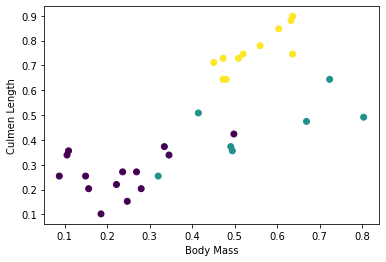

In [ ]:
# 클러스터로 시각화

plt.scatter(features[:,0], features[:,2], c=labels, cmap='viridis')

plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()
     

In [ ]:
# 선형 모델

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [ ]:
# 모델 사용

predictions = model(features)
predictions[:5]
tf.nn.softmax(predictions[:5])

print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))
         

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


### loss를 sparse categorical cross entropy를 사용하면 OHE 없이도 처리 가능

In [ ]:
# 모델 훈련 - 손실함수와 경사함수 정의

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y, training):
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))
     


Loss test: 1.161426305770874


In [ ]:
# 모델 최적화

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)
     

### stochastic gradient descent 사용

In [ ]:
# 옵티마이저 생성

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
# 단일 최적화

loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},  Loss: {}".format(optimizer.iterations.numpy(),loss(model, features, labels, training=True).numpy()))
     

Step: 0, Initial Loss: 1.161426305770874
Step: 1,  Loss: 1.1544766426086426


In [ ]:
# 모델 훈련

train_loss_results = []
train_accuracy_results = []

num_epochs = 200

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.135, Accuracy: 44.944%
Epoch 050: Loss: 0.680, Accuracy: 80.150%
Epoch 100: Loss: 0.426, Accuracy: 85.768%
Epoch 150: Loss: 0.260, Accuracy: 96.629%


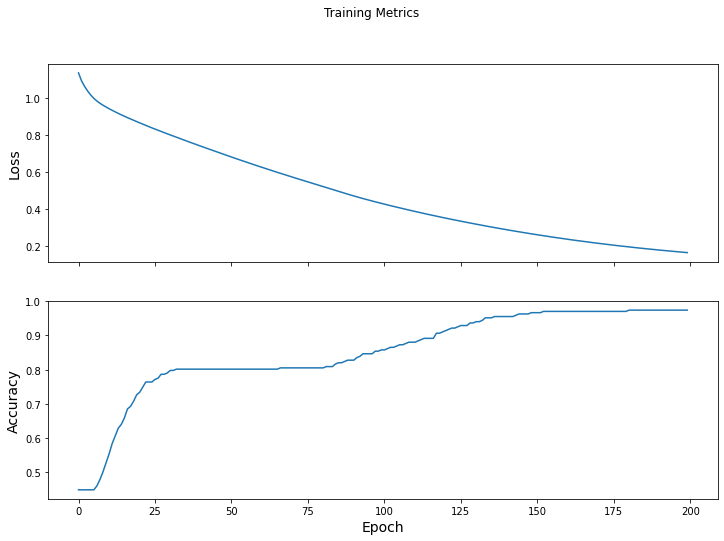

In [ ]:
# 손실함수 시각화

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
# 모델 평가

test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))
     

Test set accuracy: 98.507%


In [ ]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0]])>

### tensor는 연산 가속을 위해 사용

In [ ]:
# 훈련된 모델로 예측

predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adelie (95.2%)
Example 1 prediction: Gentoo (90.4%)
Example 2 prediction: Chinstrap (74.5%)
